In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.model_selection import train_test_split

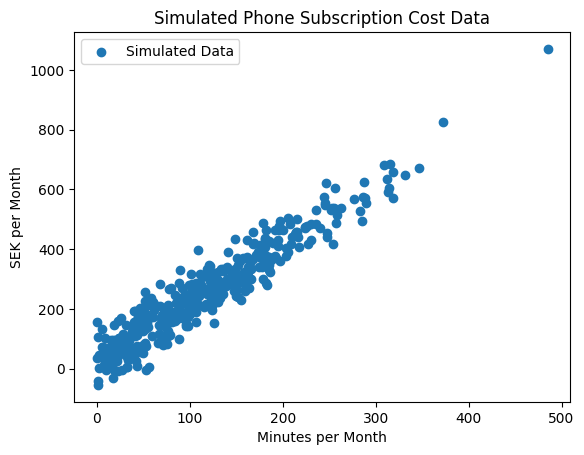

In [2]:
#0. Simulate phone dataset 
#a) simulate datset

# Set seed for reproducibility
np.random.seed(42)

# Simulate x values
x_values = np.abs(np.random.normal(100, 100, 400))

# Simulate noise values
epsilon_values = np.random.normal(0, 50, 400)

# Simulate y values
y_values = 2 * x_values + 25 + epsilon_values

# Plot the dataset
plt.scatter(x_values, y_values, label='Simulated Data')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.legend()
plt.title('Simulated Phone Subscription Cost Data')
plt.show()


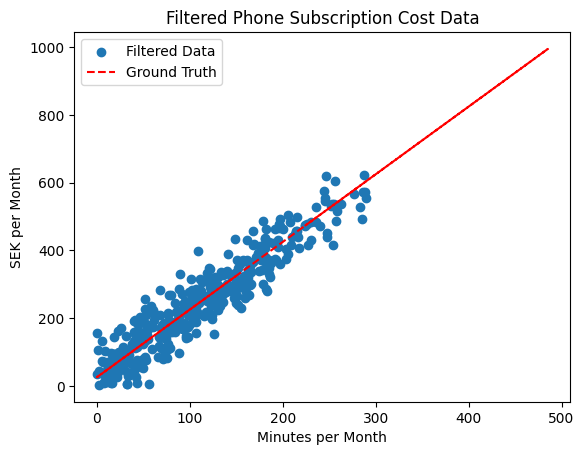

In [8]:
#b) Remove outliers and plot dataset
mask = (x_values <= 300) & (y_values >= 0)
x_values_filtered = x_values[mask]
y_values_filtered = y_values[mask]

# Plot the filtered dataset
plt.scatter(x_values_filtered, y_values_filtered, label='Filtered Data')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.plot(x_values, 2 * x_values + 25, color='red', linestyle='--', label='Ground Truth')
plt.legend()
plt.title('Filtered Phone Subscription Cost Data')
plt.show()


In [4]:
# c) Insert values into a DataFrame:
# Create a DataFrame
df = pd.DataFrame({'Minutes': x_values_filtered, 'Cost': y_values_filtered})

# Display the lengths of x and y after removing outliers
print("Length of x, outliers removed:", len(x_values_filtered))
print("Length of y, outliers removed:", len(y_values_filtered))

# Display the DataFrame head
print(df.head())


Length of x, outliers removed: 381
Length of y, outliers removed: 381
      Minutes        Cost
0  149.671415  244.621448
1   86.173570  167.378389
2  164.768854  354.799893
3  252.302986  531.955001
4   76.584663  155.666051


In [5]:
#1.
#a)
def train_test_split_custom(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_fraction, random_state=random_state)
    return X_train, X_test, y_train, y_test

"""
    Custom train-test split function.

    Parameters:
    - X: Features DataFrame
    - y: Target DataFrame
    - train_fraction: Fraction of the data to be used for training (default is 0.7)
    - random_state: Seed for random number generation (default is 42)

    Returns:
    A tuple (X_train, X_test, y_train, y_test)
    """

'\n    Custom train-test split function.\n\n    Parameters:\n    - X: Features DataFrame\n    - y: Target DataFrame\n    - train_fraction: Fraction of the data to be used for training (default is 0.7)\n    - random_state: Seed for random number generation (default is 42)\n\n    Returns:\n    A tuple (X_train, X_test, y_train, y_test)\n    '

In [6]:
#b)

data = {
    'Feature1': range(386),
    'Feature2': range(386),
    'Target': range(386)
}

df_X = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df_y = pd.DataFrame(data, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split_custom(df_X, df_y, train_fraction=0.7, random_state=42)


print("length of X_train:", len(X_train))
print("length of X_test:", len(X_test))
print("length of y_train:", len(y_train))
print("length of y_test:", len(y_test))

length of X_train: 270
length of X_test: 116
length of y_train: 270
length of y_test: 116


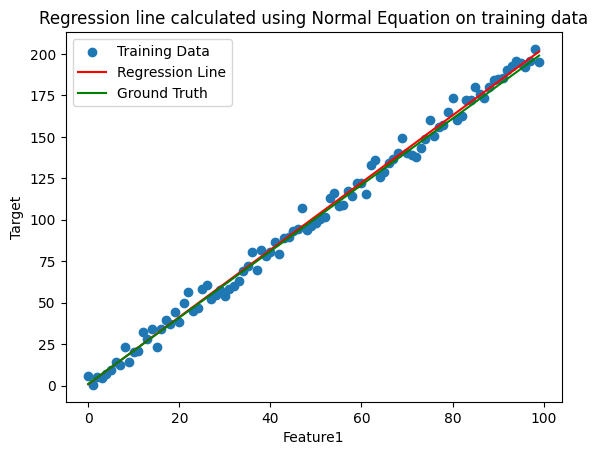

In [7]:
# 2. Simple linear regression with normal equation 


# Generate example data
data = {
    'Feature1': range(100),
    'Target': [2 * x + 1 + np.random.normal(0, 5) for x in range(100)]  # Simple linear relation with added noise
}

df = pd.DataFrame(data, columns=['Feature1', 'Target'])

# Extract feature and target columns
X_train = df[['Feature1']]
y_train = df['Target']

# Add a column of ones to X for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Use the normal equation to find the coefficients
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Extract the coefficients
beta0, beta1 = beta_hat[0], beta_hat[1]

# Plot the ground truth, training data, and regression line
plt.scatter(df['Feature1'], df['Target'], label='Training Data')
plt.plot(df['Feature1'], beta0 + beta1 * df['Feature1'], color='red', label='Regression Line')
plt.plot(df['Feature1'], 2 * df['Feature1'] + 1, color='green', linestyle='-', label='Ground Truth')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.legend()
plt.title('Regression line calculated using Normal Equation on training data')
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


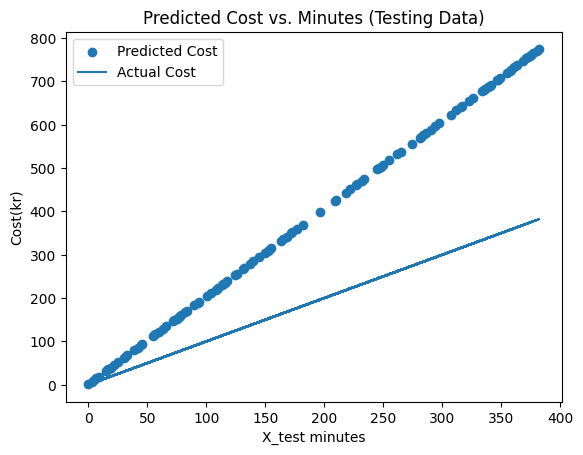

Mean Squared Error (MSE): 51221.80715846992
Mean Absolute Error (MAE): 189.22109935761827
R-squared (R2): -2.5017203886189234


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [12]:
# 3. Prediction & evaluation
import matplotlib.pyplot as plt

# Assuming you have a linear regression model named 'model' trained on X_train and y_train
# Replace this with your actual model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Plot predicted cost against X_test
plt.scatter(X_test['Feature1'], y_pred, label='Predicted Cost')
plt.plot(X_test['Feature1'], y_test, label='Actual Cost')
plt.xlabel('X_test minutes')
plt.ylabel('Cost(kr)')
plt.legend()
plt.title('Predicted Cost vs. Minutes (Testing Data)')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate y_pred from X_test
y_pred = model.predict(X_test)

# Evaluate different regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


# # Plot actual cost against X_test
# plt.scatter(X_test['Feature1'], y_test, label='Actual Cost')
# plt.xlabel('Minutes per Month')
# plt.ylabel('Actual Cost (SEK per Month)')
# plt.legend()
# plt.title('Actual Cost vs. Minutes (Testing Data)')
# plt.show()

# plt.scatter(df['Feature1'], df['Target'], label='Training Data')
# plt.plot(df['Feature1'], beta0 + beta1 * df['Feature1'], color='red', label='Regression Line')
# plt.plot(df['Feature1'], 2 * df['Feature1'] + 1, color='green', linestyle='-', label='Ground Truth')
# plt.xlabel('Feature1')
# plt.ylabel('Target')
# plt.legend()
# plt.title('Regression line calculated using Normal Equation on training data')
# plt.show()